In [335]:
import os
os.chdir('C:/Users/raffa/PycharmProjects/PortfolioProject')
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from src.data_exploration.data_exploration import *

In [336]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

import sys
!{sys.executable} -m pip install lightgbm

In [337]:
train_data = np.load( './data/train_test/train_data_lgb.npy')
test_data = np.load( './data/train_test/test_data_lgb.npy')
train_target = np.load( './data/train_test/train_target_lgb.npy')
test_target = np.load( './data/train_test/test_target_lgb.npy')

In [12]:
#train_data = np.delete(train_data,6,1)

In [338]:
train_data.shape, test_data.shape

((13540, 90), (1504, 90))

In [339]:
lin_model = LinearRegression()
lin_scores = cross_val_score(lin_model, train_data, train_target, scoring='neg_mean_absolute_percentage_error')

In [340]:
lin_scores = -lin_scores
print('Mean MAPE: %.3f (%.3f)' % (lin_scores.mean(), lin_scores.std()) )

Mean MAPE: 0.274 (0.008)


In [384]:
model = LGBMRegressor(boosting_type='gbdt',
                      n_estimators=3000,
                      learning_rate=0.025,
                      random_state=42,
                      feature_fraction=0.94,
                      lambda_l1=0.045,
                      min_data_in_leaf=4,
                      objective = 'rmse'
                     )

In [387]:
scores = cross_val_score(model, train_data, train_target, scoring='neg_mean_absolute_percentage_error', cv=10)

[LightGBM] [Warning] feature_fraction is set=0.94, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.94
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] lambda_l1 is set=0.045, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045
[LightGBM] [Warning] feature_fraction is set=0.94, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.94
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] lambda_l1 is set=0.045, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045
[LightGBM] [Warning] feature_fraction is set=0.94, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.94
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] lambda_l1 is set=0.045, reg

In [388]:
scores = -scores
print('Mean MAPE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAPE: 0.149 (0.007)


In [345]:
X_train, X_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.11, random_state=42)
eval_set = [(X_train, y_train), (X_val, y_val)]

In [389]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((12050, 90), (12050,), (1490, 90), (1490,))

In [390]:
model = LGBMRegressor(boosting_type='gbdt',
                      n_estimators=3000,
                      learning_rate=0.025,
                      random_state=42,
                      feature_fraction=0.94,
                      lambda_l1=0.045,
                      min_data_in_leaf=4,
                      objective = 'rmse'
                     )

In [391]:
eval_result = {}
callbacks=[lgb.log_evaluation(period=-1,show_stdv=False), lgb.record_evaluation(eval_result)]

In [392]:
model.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse',callbacks=callbacks)

[LightGBM] [Warning] feature_fraction is set=0.94, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.94
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] lambda_l1 is set=0.045, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045


LGBMRegressor(feature_fraction=0.94, lambda_l1=0.045, learning_rate=0.025,
              min_data_in_leaf=4, n_estimators=3000, objective='rmse',
              random_state=42)

In [373]:
val_pred = model.predict(X_val)
print(metrics.mean_absolute_percentage_error(y_val,val_pred), metrics.mean_absolute_error(y_val,val_pred))

0.13772940855596041 59936.961633921346


In [359]:
val_pred = model.predict(X_val)
print(metrics.mean_absolute_percentage_error(y_val,val_pred), metrics.mean_absolute_error(y_val,val_pred))

0.13772940855596041 59936.961633921346


In [360]:
val_pred = model.predict(X_val)
print(metrics.mean_absolute_percentage_error(y_val,val_pred), metrics.mean_absolute_error(y_val,val_pred))

0.13772940855596041 59936.961633921346


In [374]:
eval_result['training'].keys()

odict_keys(['rmse'])

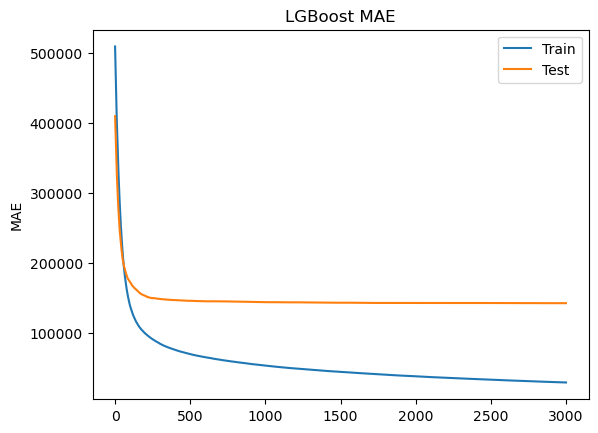

In [375]:
epochs = len(eval_result['training']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, eval_result['training']['rmse'], label='Train')
ax.plot(x_axis, eval_result['valid_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('MAE')
plt.title('LGBoost MAE')
plt.show()

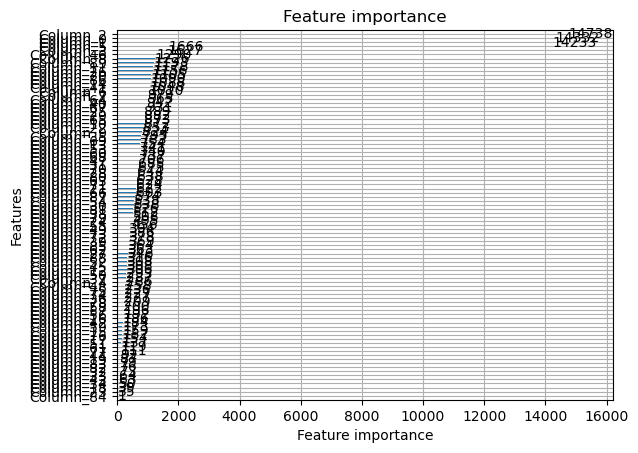

In [376]:
ax = lgb.plot_importance(model)

In [253]:
model.booster_.save_model('./model/lgb_model_1.json')

In [377]:
diff = abs(y_val-val_pred)

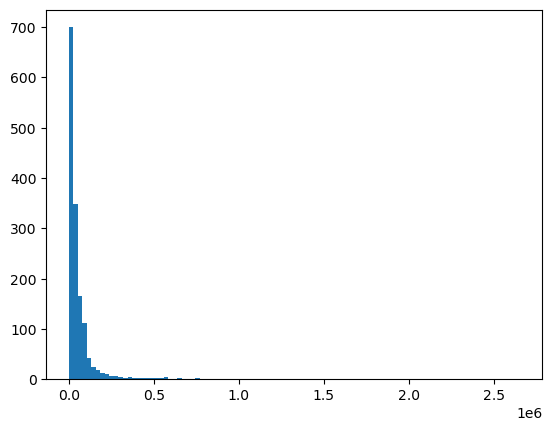

In [378]:
plt.hist(diff, bins=100)
plt.show()

In [379]:
diff.mean(), diff.std()

(59936.961633921346, 129922.03200045771)

In [380]:
np.percentile(diff, q=[10, 20, 30, 40, 50, 60, 70, 80, 90, 95])

array([  4609.60520207,  10112.86317657,  15510.77485439,  21286.99399474,
        29143.04797487,  38268.97419083,  52196.51924713,  72726.16345446,
       111562.48366762, 192996.9345762 ])

In [381]:
diff_percentage = abs((y_val-val_pred)/y_val)

In [382]:
diff_percentage.mean(), diff_percentage.std()

(0.13772940855596041, 0.16108673359192646)

In [383]:
np.percentile(diff_percentage, q=[10, 20, 30, 40, 50, 60, 70, 80, 90, 95])

array([0.01467435, 0.03287946, 0.05047977, 0.07338658, 0.09367102,
       0.12575947, 0.15865331, 0.19724289, 0.28414314, 0.4056652 ])

# Model tuning with optuna

In [428]:
import optuna 
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold, KFold
from optuna.integration import LightGBMPruningCallback

In [430]:
train = read_sqlite_table('train', './data/train_test/train_data_lgb.db')
test = read_sqlite_table('test', './data/train_test/test_data_lgb.db')
train_target = train['price']
train_data = train.drop('price', axis=1)
test_target = test['price']
test_data = test.drop('price', axis=1)

In [470]:
def objective(trial, X, y):
    param_grid = {
        "random_state": trial.suggest_categorical("random_state", [42]),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "min_child_samples": trial.suggest_int("min_data_in_leaf", 0, 200, step=5),
        "reg_alpha": trial.suggest_int("lambda_l1", 0, 100, step=1),
        "reg_lambda": trial.suggest_int("lambda_l2", 0, 100, step=1),
        "min_split_gain": trial.suggest_float("min_gain_to_split", 0, 15, step=1),
        "subsample": trial.suggest_float(
            "subsample", 0.2, 0.99, step=0.01
        ),
        "subsample_freq": trial.suggest_categorical("subsample_freq", [1]),
        "colsample_bytree": trial.suggest_float(
            "feature_fraction", 0.2, 0.99, step=0.01
        ),
    }

    cv = KFold(n_splits=8, shuffle=True, random_state=42)

    cv_scores = np.empty(8)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = LGBMRegressor(objective="rmse", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="rmse",
            callbacks=[
                lgb.early_stopping(100, verbose=False)
            ],  # Add a pruning callback
        )
        preds = model.predict(X_test)
        cv_scores[idx] = metrics.mean_absolute_error(y_test, preds)

    return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(direction="minimize", study_name="LGBM Regressor")

In [474]:
func = lambda trial: objective(trial, train_data, train_target)

In [481]:
study = optuna.load_study(study_name="LGBM Regressor 1", storage="sqlite:///model/LGBMRegressor_study.db")

In [479]:
save_study = optuna.create_study(study_name="LGBM Regressor 1", storage="sqlite:///model/LGBMRegressor_study.db")
save_study.add_trials(study.trials)

[I 2023-06-24 22:23:28,995] A new study created in RDB with name: LGBM Regressor 1


In [482]:
print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (rmse): 78768.70645
	Best params:
		feature_fraction: 0.96
		lambda_l1: 95
		lambda_l2: 98
		learning_rate: 0.03499346237813555
		min_data_in_leaf: 130
		min_gain_to_split: 0.0
		n_estimators: 10000
		num_leaves: 1280
		random_state: 42
		subsample: 0.75
		subsample_freq: 1


In [483]:
study.optimize(func, n_trials=79)

[I 2023-06-24 22:29:23,029] Trial 822 finished with value: 78411.11278007421 and parameters: {'feature_fraction': 0.96, 'lambda_l1': 97, 'lambda_l2': 98, 'learning_rate': 0.03638692631557678, 'min_data_in_leaf': 125, 'min_gain_to_split': 0.0, 'n_estimators': 10000, 'num_leaves': 1200, 'random_state': 42, 'subsample': 0.74, 'subsample_freq': 1}. Best is trial 822 with value: 78411.11278007421.
[I 2023-06-24 22:30:13,433] Trial 823 finished with value: 78897.93036555903 and parameters: {'feature_fraction': 0.97, 'lambda_l1': 97, 'lambda_l2': 98, 'learning_rate': 0.036256392638777474, 'min_data_in_leaf': 125, 'min_gain_to_split': 0.0, 'n_estimators': 10000, 'num_leaves': 1200, 'random_state': 42, 'subsample': 0.73, 'subsample_freq': 1}. Best is trial 822 with value: 78411.11278007421.
[I 2023-06-24 22:31:05,728] Trial 824 finished with value: 78553.80266292563 and parameters: {'feature_fraction': 0.96, 'lambda_l1': 97, 'lambda_l2': 98, 'learning_rate': 0.03642500894652525, 'min_data_in_le